## Predictor

age - Age of the patient  
  
sex - Sex of the patient  

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=[8,6]

In [2]:
#Loading the dataset
df = pd.read_csv("heart.csv")

In [3]:
#Checking first few rows of our dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Checking column datatype and shape of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Checking the summary of numeric columns
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualization

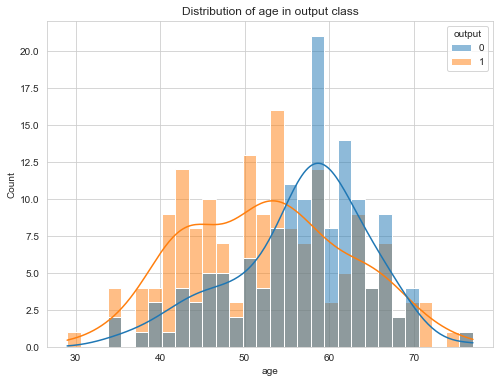

In [6]:
#Comparing the age distribution of patients who had heart attack and those who didn't
sns.histplot(data=df,x="age",hue="output",bins=30, kde=True)
plt.title("Distribution of age in output class")
plt.show()

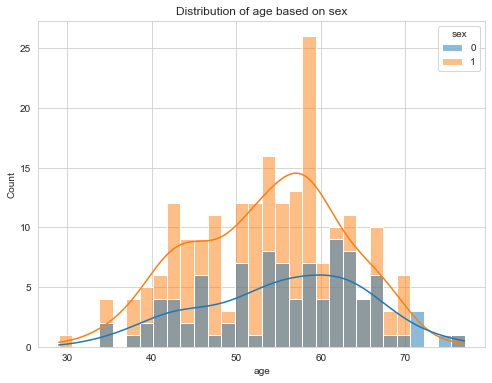

In [7]:
#Comparing the population of different sex in each class
sns.histplot(data=df,x="age",hue="sex",bins=30, kde=True)
plt.title("Distribution of age based on sex")
plt.show()

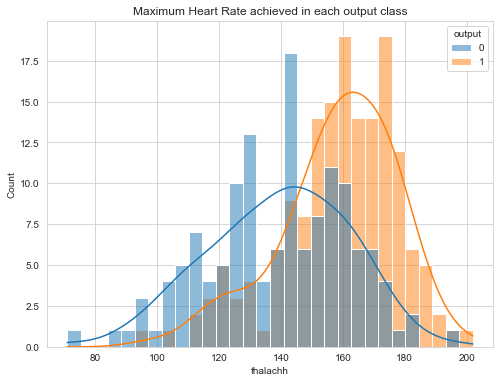

In [8]:
#Infering the effect of maximum heart rate achieved on occurence of heart attack
sns.histplot(data=df,x="thalachh",hue="output",bins=30, kde=True)
plt.title("Maximum Heart Rate achieved in each output class")
plt.show()

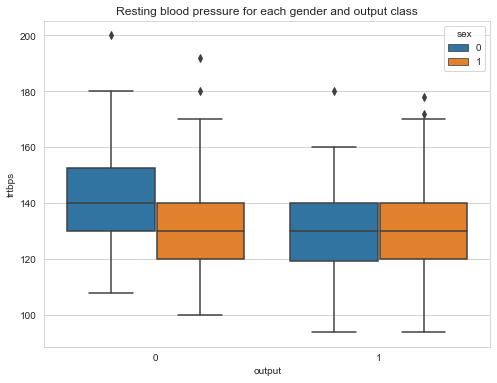

In [9]:
#Resting blood pressure vs occurence of heart-attack for different sex class
sns.boxplot(data=df,x="output",y="trtbps",hue="sex")
plt.title("Resting blood pressure for each gender and output class")
plt.show()

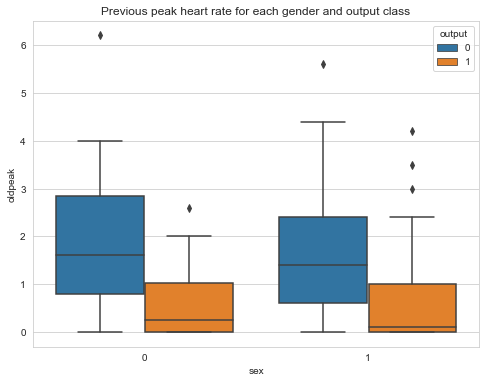

In [10]:
#Previous peak heart rate vs occurence of heart-attack for different sex class
sns.boxplot(data=df,x="sex",y="oldpeak",hue="output")
plt.title("Previous peak heart rate for each gender and output class")
plt.show()

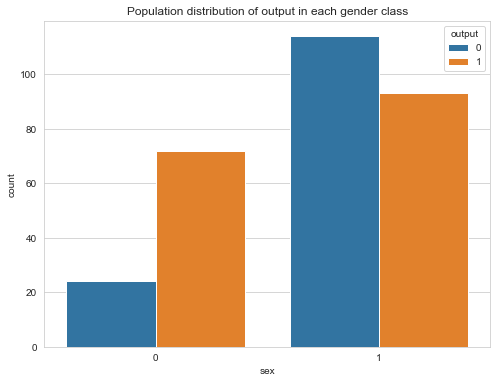

In [11]:
sns.countplot(data=df,x="sex",hue="output")
plt.title("Population distribution of output in each gender class")
plt.show()

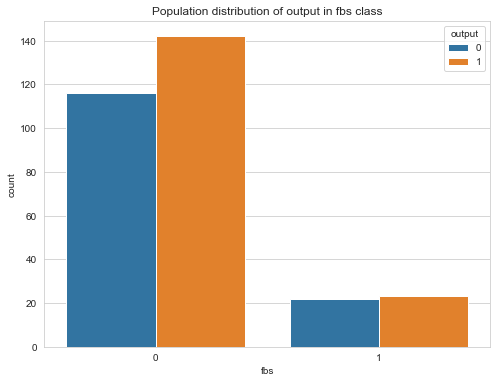

In [12]:
sns.countplot(data=df,x="fbs",hue="output")
plt.title("Population distribution of output in fbs class")
plt.show()

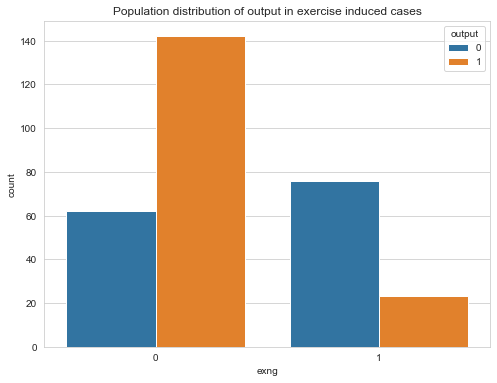

In [13]:
sns.countplot(data=df,x="exng",hue="output")
plt.title("Population distribution of output in exercise induced cases")
plt.show()

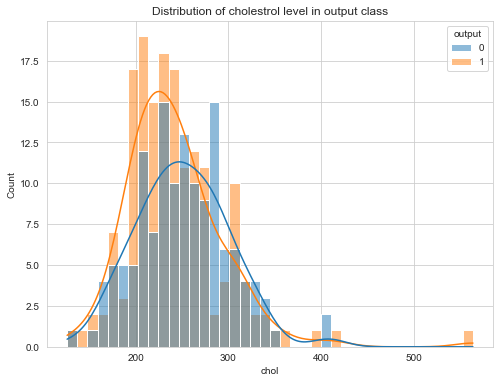

In [14]:
#Infering the effect of maximum heart rate achieved on occurence of heart attack
sns.histplot(data=df,x="chol",hue="output",bins=40, kde=True)
plt.title("Distribution of cholestrol level in output class")
plt.show()

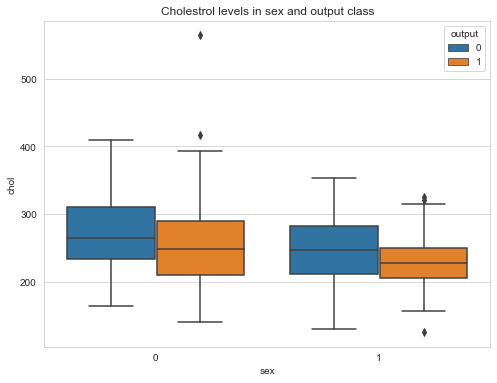

In [15]:
sns.boxplot(data=df,x="sex",y="chol",hue="output")
plt.title("Cholestrol levels in sex and output class")
plt.show()

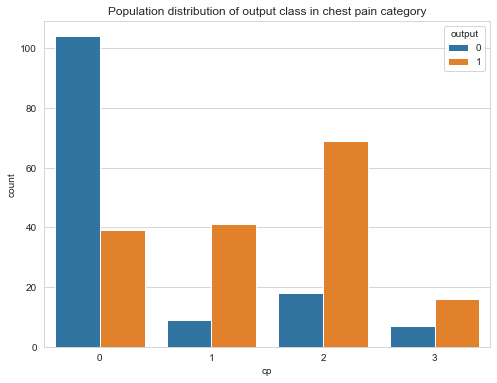

In [16]:
sns.countplot(data=df,x="cp",hue="output")
plt.title("Population distribution of output class in chest pain category")
plt.show()

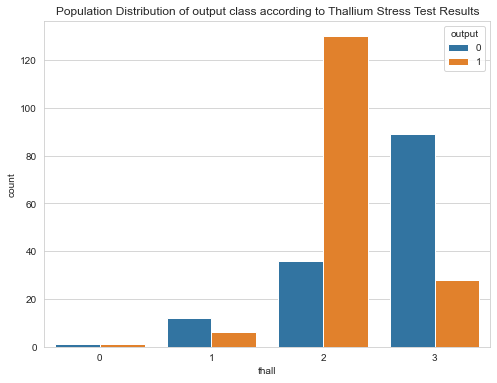

In [17]:
sns.countplot(data=df,x="thall",hue="output")
plt.title("Population Distribution of output class according to Thallium Stress Test Results")
plt.show()

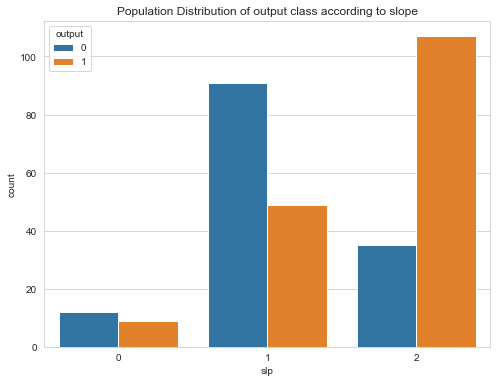

In [18]:
sns.countplot(data=df,x="slp",hue="output")
plt.title("Population Distribution of output class according to slope")
plt.show()

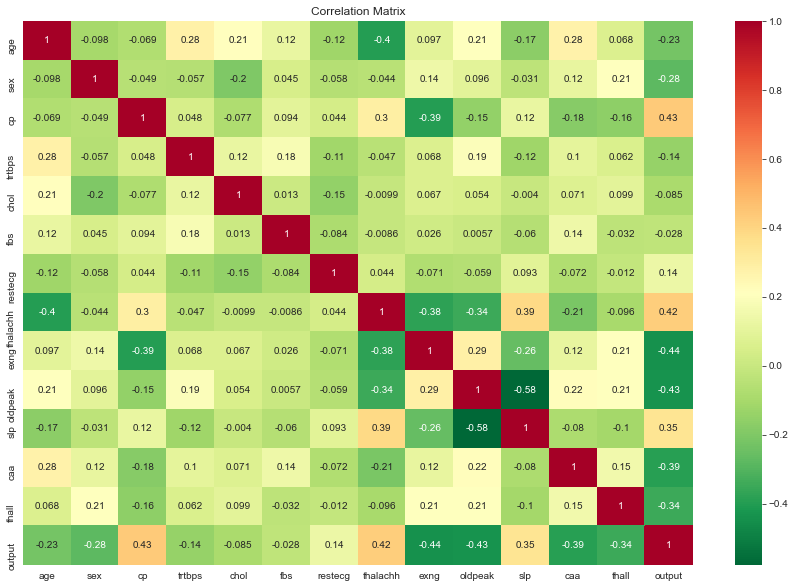

In [19]:
fig=plt.figure(figsize=(15,10))
fig=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r')
plt.title("Correlation Matrix")
plt.show()

## Data Manipulation

In [20]:
df.replace({"cp":{0: "typical",1: "atypical", 2: "non-anginal", 3: "asymptomatic"}},inplace=True)

In [21]:
df=df.join(pd.get_dummies(df.cp,drop_first=True))
df.drop('cp',axis=1,inplace=True)

In [22]:
df.replace({"restecg":{0 : "Normal", 1 : "ST-T", 2 : "Left_ventricular-hypertrophy"}},inplace=True)

In [23]:
df=df.join(pd.get_dummies(df.restecg,drop_first=True))
df.drop('restecg',axis=1,inplace=True)

## Model Building - Training and Test Data

In [24]:
# Importing model building libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve,roc_auc_score

In [25]:
X=df.drop("output",axis=1)
y=df.output

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Logistic Regression

In [27]:
model=LogisticRegression(max_iter=500,solver='liblinear',random_state=101)

In [28]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=101, solver='liblinear')

In [29]:
X_train_pred=model.predict(X_train)

In [30]:
print(classification_report(y_train, X_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        94
           1       0.83      0.90      0.86       118

    accuracy                           0.84       212
   macro avg       0.84      0.83      0.84       212
weighted avg       0.84      0.84      0.84       212



In [31]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [32]:
X_test_prob=model.predict_proba(X_test)[:,1]

In [33]:
scores=pd.DataFrame()

In [34]:
scores.loc[:,["Cutoff","Accuracy","Precision","Recall","F1_Score"]]=""

In [35]:
for i in range(101):
    x=i/100
    cutoff=x
    accuracy=accuracy_score(y_test,np.where(X_test_prob>=x,1,0))
    precision=precision_score(y_test,np.where(X_test_prob>=x,1,0))
    recall=recall_score(y_test,np.where(X_test_prob>=x,1,0))
    f1=f1_score(y_test,np.where(X_test_prob>=x,1,0))
    scores.loc[i,:]=[cutoff,accuracy,precision,recall,f1]

C:\Users\Skylight101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
scores

,Cutoff,Accuracy,Precision,Recall,F1_Score
0,0.0,0.516484,0.516484,1.0,0.681159
1,0.01,0.549451,0.534091,1.0,0.696296
2,0.02,0.626374,0.580247,1.0,0.734375
3,0.03,0.626374,0.580247,1.0,0.734375
4,0.04,0.67033,0.61039,1.0,0.758065
...,...,...,...,...,...
96,0.96,0.571429,1.0,0.170213,0.290909
97,0.97,0.538462,1.0,0.106383,0.192308
98,0.98,0.516484,1.0,0.06383,0.12
99,0.99,0.494505,1.0,0.021277,0.041667


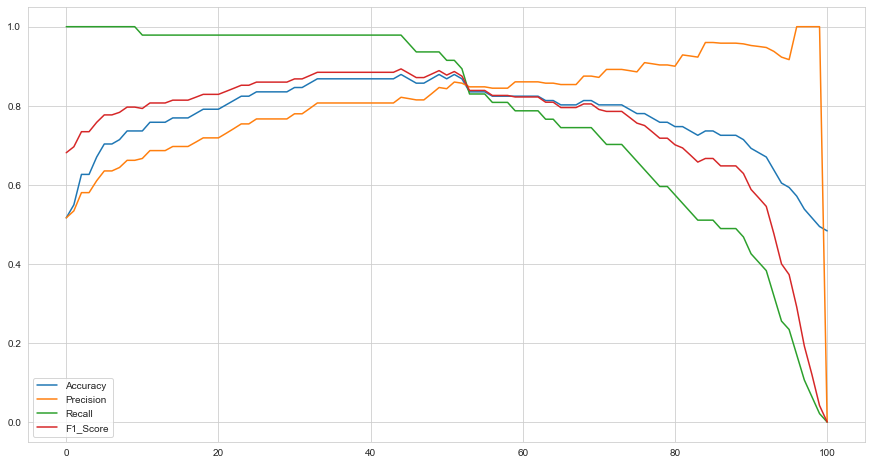

In [37]:
plt.figure(figsize=[15,8])
scores.Accuracy.plot()
scores.Precision.plot()
scores.Recall.plot()
scores.F1_Score.plot()
plt.legend()
plt.show()

In [38]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [39]:
print(classification_report(y_test, np.where(model.predict_proba(X_test)[:,1]>=0.44, 1, 0)))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.82      0.98      0.89        47

    accuracy                           0.88        91
   macro avg       0.90      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [40]:
a1,b1,c1=roc_curve(y_train,model.predict_proba(X_train)[:,1])
a2,b2,c2=roc_curve(y_test,model.predict_proba(X_test)[:,1])

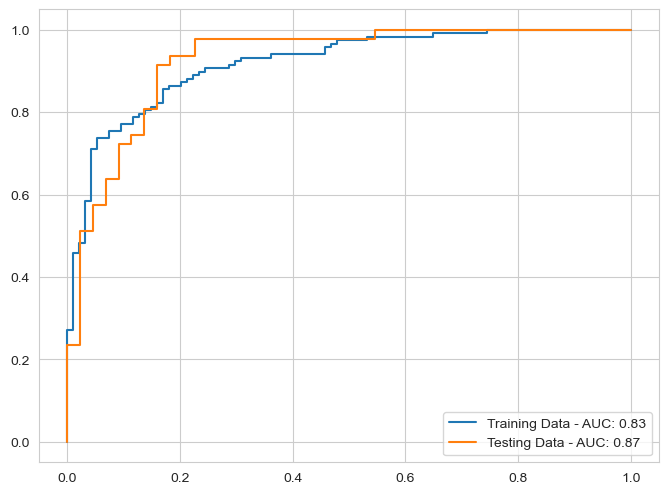

In [41]:
plt.figure(dpi=100)
train_auc=round(roc_auc_score(y_train,model.predict(X_train)),2)
test_auc=round(roc_auc_score(y_test,model.predict(X_test)),2)
plt.plot(a1,b1,label="Training Data - AUC: {}".format(train_auc))
plt.plot(a2,b2,label="Testing Data - AUC: {}".format(test_auc))
plt.legend()
plt.show()

In [42]:
X_train_pred_new=np.where(model.predict_proba(X_train)[:,1]>=0.44,1,0)
X_test_pred_new=np.where(model.predict_proba(X_test)[:,1]>=0.44,1,0)

In [43]:
a1,b1,c1=roc_curve(y_train,model.predict(X_train))
a2,b2,c2=roc_curve(y_train,X_train_pred_new)

In [44]:
x1,y1,z1=roc_curve(y_test,model.predict(X_test))
x2,y2,z2=roc_curve(y_test,X_test_pred_new)

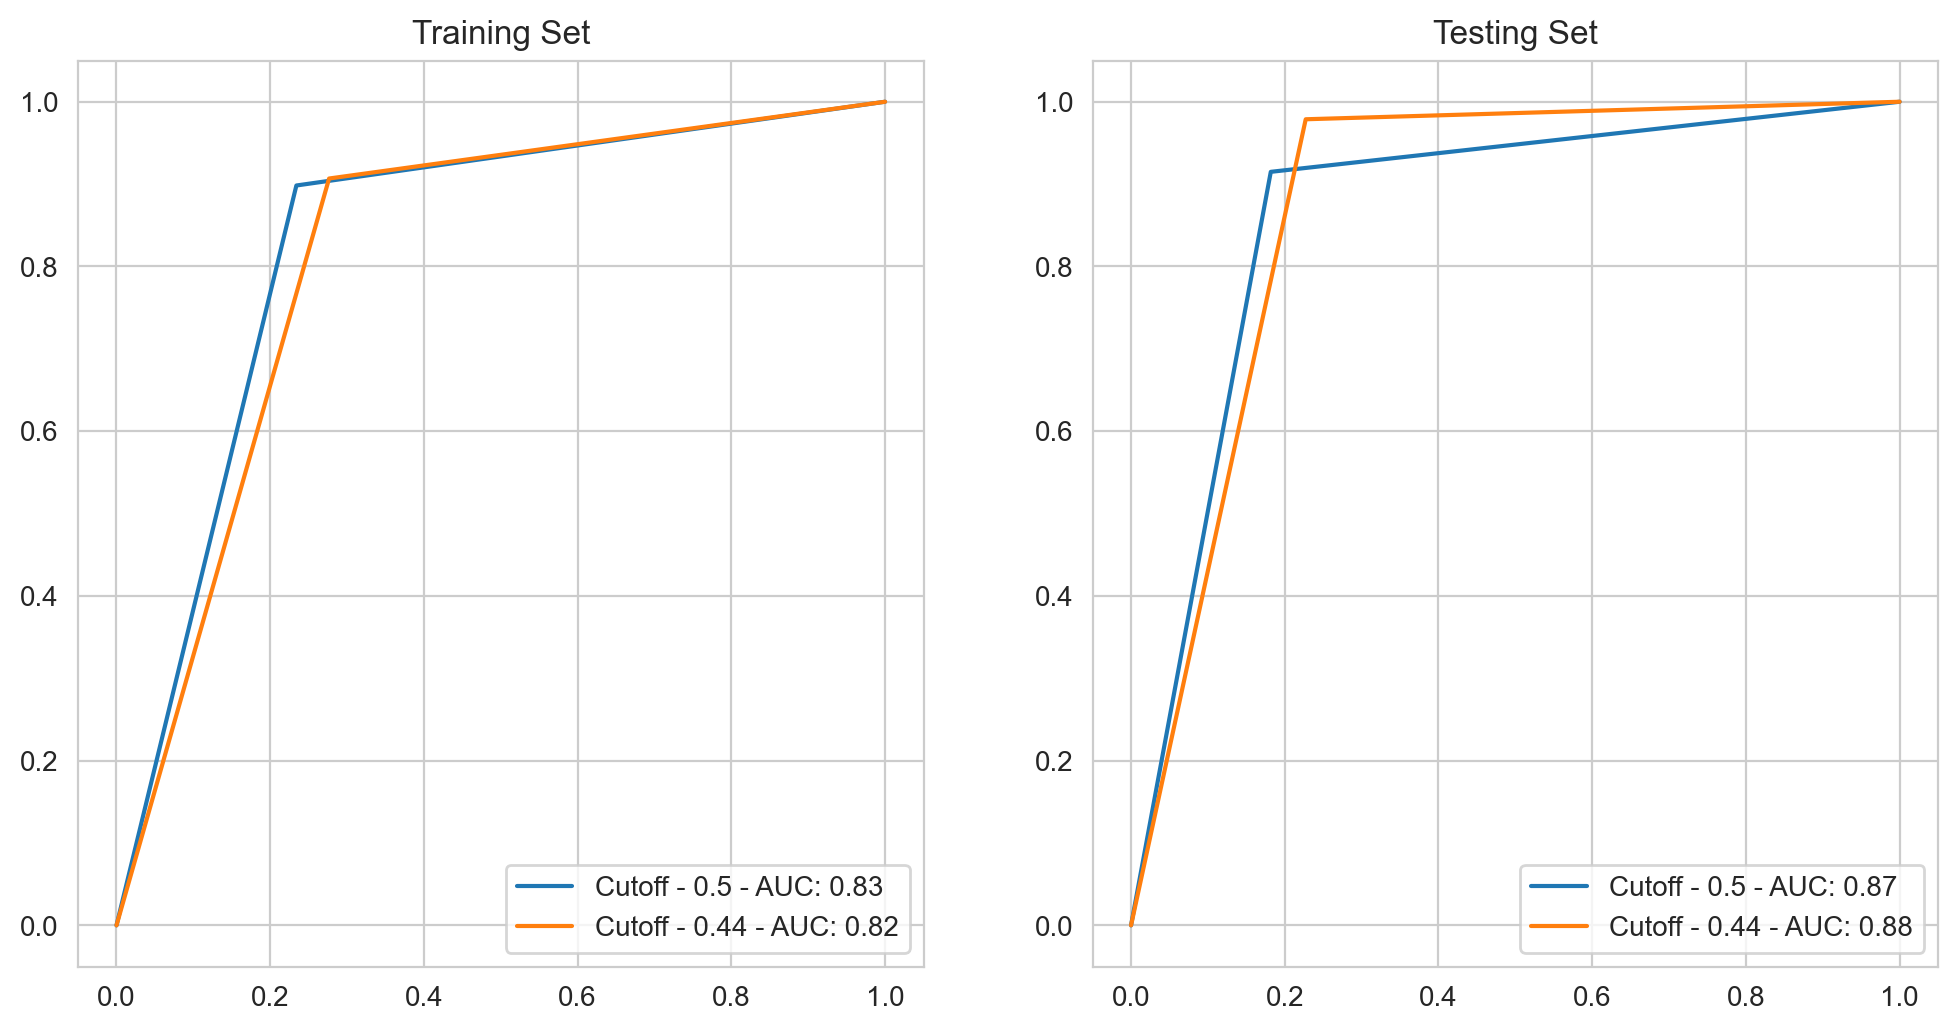

In [45]:
plt.figure(figsize=[12,6],dpi=200)
plt.subplot(1,2,1)

train_auc=round(roc_auc_score(y_train,model.predict(X_train)),2)
train_auc_new=round(roc_auc_score(y_train,X_train_pred_new),2)
plt.plot(a1,b1,label="Cutoff - 0.5 - AUC: {}".format(train_auc))
plt.plot(a2,b2,label="Cutoff - 0.44 - AUC: {}".format(train_auc_new))
plt.title("Training Set")
plt.legend()

plt.subplot(1,2,2)
test_auc=round(roc_auc_score(y_test,model.predict(X_test)),2)
test_auc_new=round(roc_auc_score(y_test,X_test_pred_new),2)
plt.plot(x1,y1,label="Cutoff - 0.5 - AUC: {}".format(test_auc))
plt.plot(x2,y2,label="Cutoff - 0.44 - AUC: {}".format(test_auc_new))
plt.title("Testing Set")

plt.legend()
plt.show()

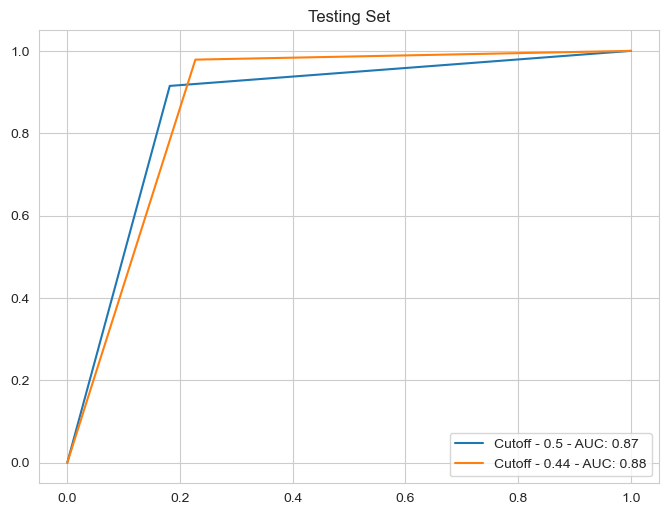

In [46]:
plt.figure(dpi=100)
test_auc=round(roc_auc_score(y_test,model.predict(X_test)),2)
test_auc_new=round(roc_auc_score(y_test,X_test_pred_new),2)
plt.plot(x1,y1,label="Cutoff - 0.5 - AUC: {}".format(test_auc))
plt.plot(x2,y2,label="Cutoff - 0.44 - AUC: {}".format(test_auc_new))
plt.title("Testing Set")
plt.legend()
plt.show()

In [47]:
coeffs=pd.DataFrame(list(model.coef_[0]),index=list(X.columns),columns=["Co-efficient"])
coeffs.sort_values(by="Co-efficient",inplace=True,ascending=False)
coeffs

,Co-efficient
non-anginal,0.801459
slp,0.566556
ST-T,0.559473
fbs,0.438053
Normal,0.104098
thalachh,0.025155
age,0.004392
chol,-0.002823
trtbps,-0.008951
atypical,-0.079403


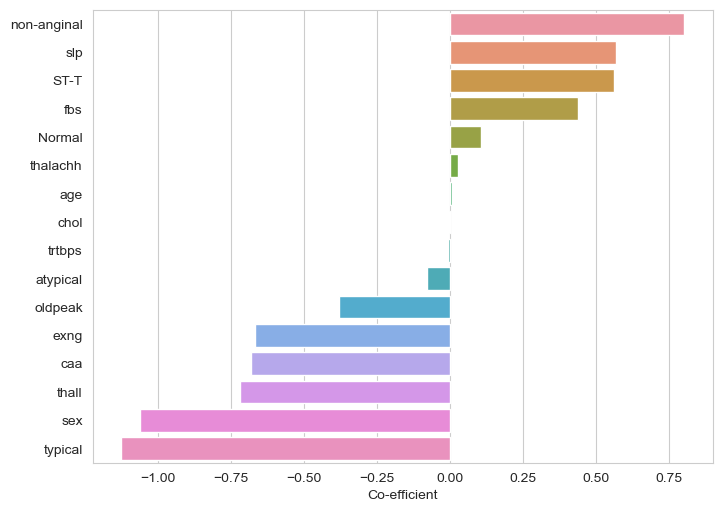

In [48]:
plt.figure(dpi=100)
sns.barplot(y=coeffs.index,x=coeffs['Co-efficient'])
plt.show()